In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load in Data

In [167]:
Titanic = sns.load_dataset('titanic')

In [168]:
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [169]:
Titanic.shape

(891, 15)

## Data Wrangling

### Recoding the variable that are not numeric

In [1]:
# Dropping, who, adult_male, alive, class, embarked_town

In [170]:
Titanic = Titanic.drop('who', axis=1)

In [197]:
Titanic = Titanic.drop('adult_male', axis=1)

In [171]:
Titanic = Titanic.drop('alive', axis=1)

In [198]:
Titanic = Titanic.drop('class', axis=1)

In [172]:
Titanic = Titanic.drop('embark_town', axis=1)

In [173]:
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,First,False,B,True
888,0,3,female,NaN,1,2,23.4500,S,Third,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,First,True,C,True


In [ ]:
# we will recode, sex, embarked, deck, embarked_town, alone

In [174]:
Titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [175]:
def recode (series):
    if series == "S":
        return 0
    if series == "C":
        return 1
    if series == "Q":
        return 2
    if series == "nan":
        return 3
Titanic['embarkedr'] = Titanic['embarked'].apply(recode)

In [176]:
def recode (series):
    if series == "female":
        return 0
    if series == "male":
        return 1
Titanic['sexr'] = Titanic['sex'].apply(recode)

In [177]:
Titanic.deck.unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [178]:
def recode (series):
    if series == "NaN":
        return 1
    if series == "C":
        return 2
    if series == "E":
        return 3
    if series == "G":
        return 4
    if series == "D":
        return 5
    if series == "A":
        return 6
    if series == "B":
        return 7
    if series == "F":
        return 8 
Titanic['deckr'] = Titanic['deck'].apply(recode)

In [179]:
Titanic.alone.unique()

array([False,  True])

In [180]:
def recode (series):
    if series == "false":
        return 0
    if series == "true":
        return 1
Titanic['aloner'] = Titanic['alone'].apply(recode)

In [182]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,alone,embarkedr,sexr,deckr,aloner
0,0,3,male,22.0,1,0,7.2500,S,Third,True,NaN,False,0.0,1,NaN,None
1,1,1,female,38.0,1,0,71.2833,C,First,False,C,False,1.0,0,2,None
2,1,3,female,26.0,0,0,7.9250,S,Third,False,NaN,True,0.0,0,NaN,None
3,1,1,female,35.0,1,0,53.1000,S,First,False,C,False,0.0,0,2,None
4,0,3,male,35.0,0,0,8.0500,S,Third,True,NaN,True,0.0,1,NaN,None


In [ ]:
# Dropping missing rows

In [183]:
Titanic.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
adult_male      0
deck          688
alone           0
embarkedr       2
sexr            0
deckr         688
aloner        891
dtype: int64

In [ ]:
# Dropped the columns with the most missing data

In [184]:
Titanic = Titanic.drop('age', axis=1)

In [185]:
Titanic = Titanic.drop('deck', axis=1)

In [186]:
Titanic = Titanic.drop('deckr', axis=1)

In [187]:
Titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,adult_male,alone,embarkedr,sexr,aloner
0,0,3,male,1,0,7.2500,S,Third,True,False,0.0,1,None
1,1,1,female,1,0,71.2833,C,First,False,False,1.0,0,None
2,1,3,female,0,0,7.9250,S,Third,False,True,0.0,0,None
3,1,1,female,1,0,53.1000,S,First,False,False,0.0,0,None
4,0,3,male,0,0,8.0500,S,Third,True,True,0.0,1,None


In [ ]:
# Realized what is left back with strings was recoded needs to go as well.

In [188]:
Titanic = Titanic.drop('sex', axis=1)

In [189]:
Titanic = Titanic.drop('alone', axis=1)

In [190]:
Titanic = Titanic.drop('embarked', axis=1)

In [195]:
Titanic = Titanic.drop('aloner', axis=1)

In [199]:
Titanic

,survived,pclass,sibsp,parch,fare,embarkedr,sexr
0,0,3,1,0,7.2500,0.0,1
1,1,1,1,0,71.2833,1.0,0
2,1,3,0,0,7.9250,0.0,0
3,1,1,1,0,53.1000,0.0,0
4,0,3,0,0,8.0500,0.0,1
...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0.0,1
887,1,1,0,0,30.0000,0.0,0
888,0,3,1,2,23.4500,0.0,0
889,1,1,0,0,30.0000,1.0,1


In [ ]:
#Something is giving nan even though, it was recoded for 3. It turns out to be embarkedr. I am dropping it.

In [203]:
Titanic.survived.unique()

array([0, 1], dtype=int64)

In [204]:
Titanic.pclass.unique()

array([3, 1, 2], dtype=int64)

In [205]:
Titanic.sibsp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [206]:
Titanic.parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [209]:
Titanic.embarkedr.unique()

array([ 0.,  1.,  2., nan])

In [210]:
Titanic.sexr.unique()

array([1, 0], dtype=int64)

In [211]:
Titanic = Titanic.drop('embarkedr', axis=1)

In [212]:
Titanic.head()

,survived,pclass,sibsp,parch,fare,sexr
0,0,3,1,0,7.2500,1
1,1,1,1,0,71.2833,0
2,1,3,0,0,7.9250,0
3,1,1,1,0,53.1000,0
4,0,3,0,0,8.0500,1


### Picking X and Y

In [ ]:
#X is really is being stated by showing that what is picked for Y is dropped and everything left is being used.

In [213]:
x = Titanic.drop('survived' , axis=1)
y = Titanic['survived']

### Training Test Split

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

In [215]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

In [216]:
treePredictions = decisionTree.predict(x_test)

### Reading the Confusion Matrix

In [218]:
print(confusion_matrix(y_test, treePredictions))

[[151  14]
 [ 34  69]]


### How well did the Model Fit?

In [219]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       165
           1       0.83      0.67      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



## Part 2 Random Forest Machine Learning

### Importing Packages

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Picking X and Y, Usig Train Test Split

In [221]:
x = Titanic.drop('survived' , axis=1)
y = Titanic['survived']

In [222]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Initial Random Forest Model

In [223]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

### Reviewing the Confusion Matrix

In [224]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[153  12]
 [ 37  66]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       165
           1       0.85      0.64      0.73       103

    accuracy                           0.82       268
   macro avg       0.83      0.78      0.80       268
weighted avg       0.82      0.82      0.81       268



### Hyperparameter Tuning 

In [225]:
from sklearn.model_selection import RandomizedSearchCV

### Estimator- how many nodes do you allow. The higher the number the better

In [226]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.7276119402985075
4 : 0.8134328358208955
5 : 0.8134328358208955
8 : 0.8208955223880597
10 : 0.8283582089552238
20 : 0.8134328358208955
50 : 0.8208955223880597
75 : 0.8208955223880597
100 : 0.8171641791044776
250 : 0.8208955223880597
500 : 0.8171641791044776


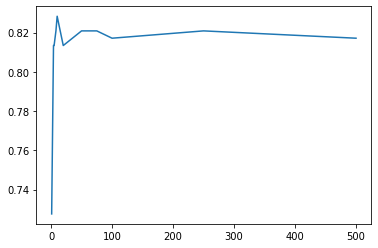

In [227]:
plt.plot(n_estimators_array, results)

### Tuning the remaing Tree

In [228]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [229]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [230]:
rf_random.fit(x_train, y_train)

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

In [231]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': None, 'max_depth': 80}

In [234]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features= None, max_depth=80)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, max_features=None, min_samples_leaf=4,
                       n_estimators=10)

In [235]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[152  13]
 [ 33  70]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       165
           1       0.84      0.68      0.75       103

    accuracy                           0.83       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.83      0.83      0.82       268



## Feature Importance

In [236]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

pclass    0.125649
sibsp     0.042053
parch     0.035316
fare      0.345566
sexr      0.451417
dtype: float64

<AxesSubplot:>

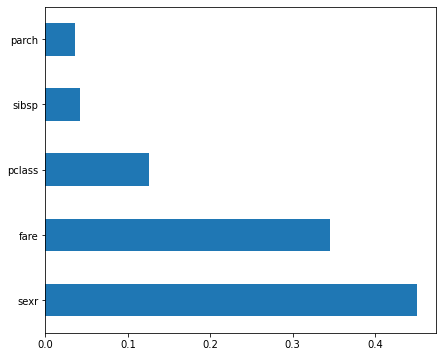

In [238]:
feature_importances.plot(kind='barh', figsize=(7,6))